<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-22 09:49:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  70.6MB/s    in 2.9s    

2025-03-22 09:49:10 (70.6 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


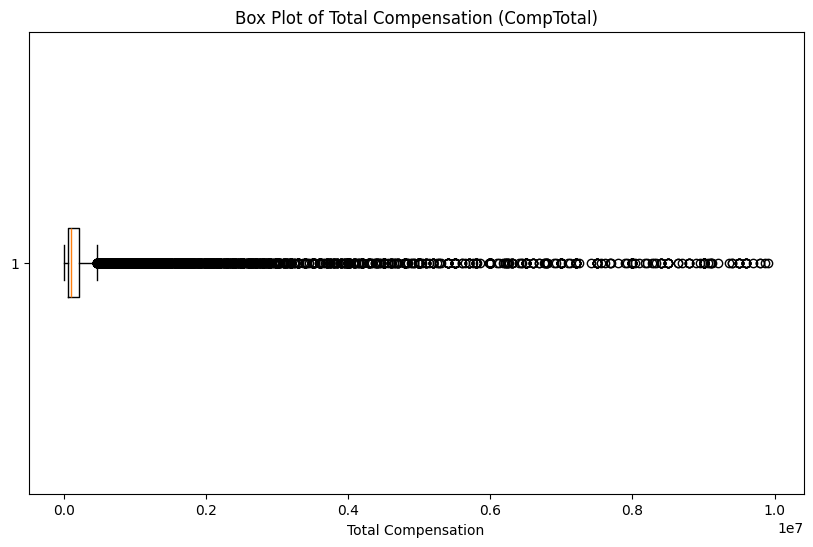

In [8]:
# your code goes here
# Query to get CompTotal data
QUERY = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL AND CompTotal < 1e7  -- Limit extreme values for better visualization
"""
comp_total_df = pd.read_sql_query(QUERY, conn)

# Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(comp_total_df['CompTotal'].dropna(), vert=False)
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


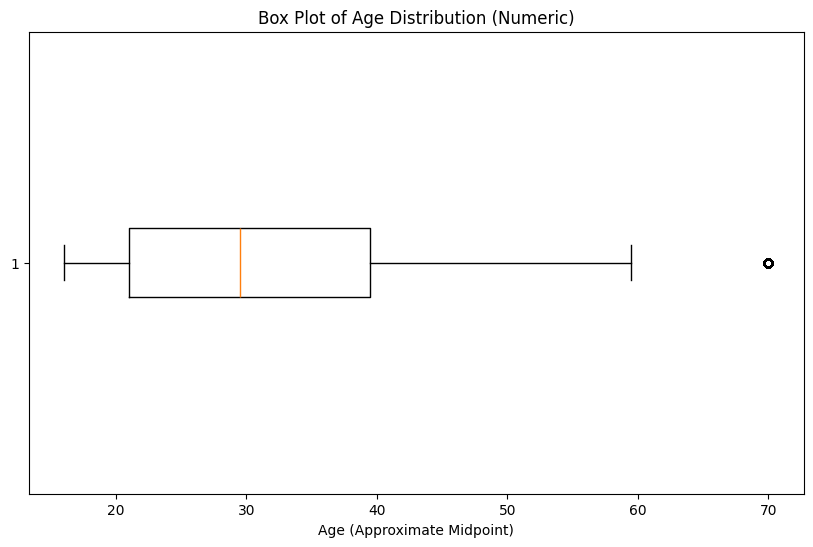

In [9]:
# your code goes here
# Query to get Age data
QUERY = """
SELECT Age 
FROM main 
WHERE Age IS NOT NULL
"""
age_df = pd.read_sql_query(QUERY, conn)

# Convert Age to numeric midpoint values
age_mapping = {
    'Under 18 years old': 16, '18-24 years old': 21, '25-34 years old': 29.5,
    '35-44 years old': 39.5, '45-54 years old': 49.5, '55-64 years old': 59.5,
    '65 years or older': 70, 'Prefer not to say': None
}
age_df['AgeNumeric'] = age_df['Age'].map(age_mapping)

# Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(age_df['AgeNumeric'].dropna(), vert=False)
plt.title('Box Plot of Age Distribution (Numeric)')
plt.xlabel('Age (Approximate Midpoint)')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_2533/3719972342.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(comp_by_age, labels=age_groups)


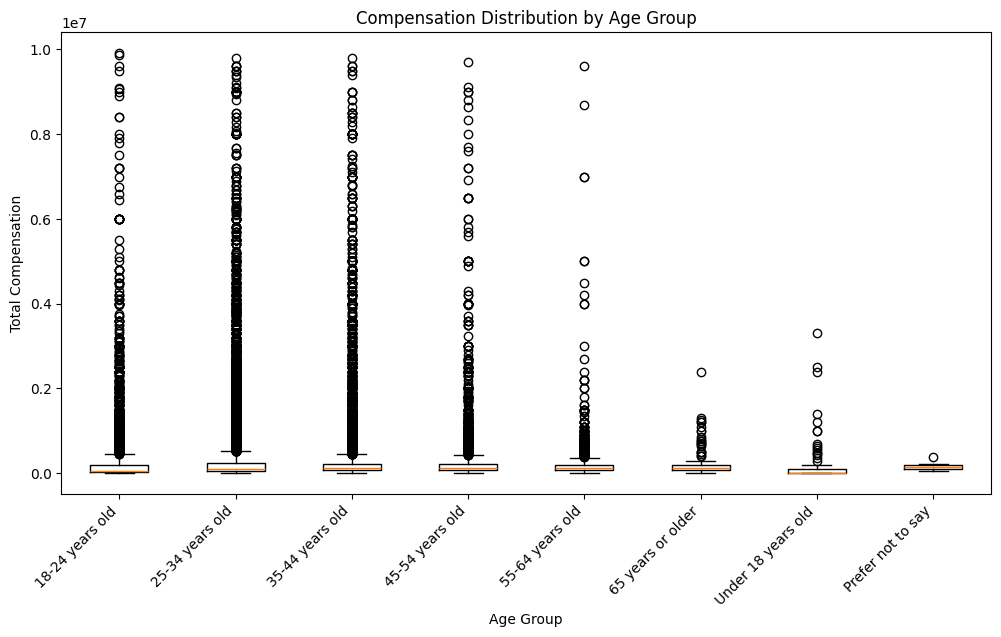

In [10]:
# your code goes here
# Query to get CompTotal and Age data
QUERY = """
SELECT Age, CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL AND CompTotal < 1e7
"""
comp_age_df = pd.read_sql_query(QUERY, conn)

# Prepare data for box plot
age_groups = comp_age_df['Age'].unique()
comp_by_age = [comp_age_df[comp_age_df['Age'] == age]['CompTotal'].dropna() for age in age_groups]

# Plot box plot
plt.figure(figsize=(12, 6))
plt.boxplot(comp_by_age, labels=age_groups)
plt.title('Compensation Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_2533/2387020953.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(comp_by_jobsat, labels=jobsat_levels)


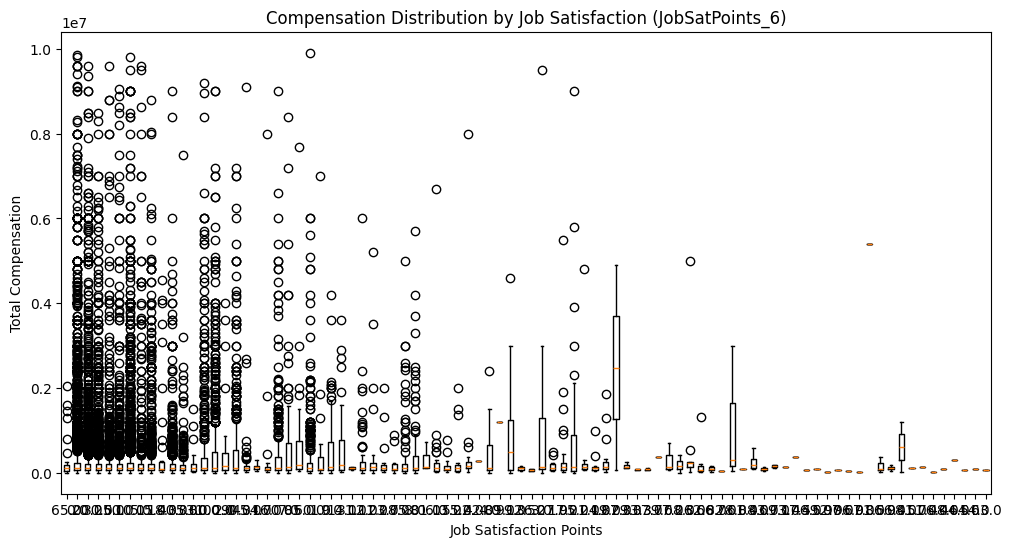

In [11]:
# your code goes here
# Query to get CompTotal and JobSatPoints_6 data
QUERY = """
SELECT JobSatPoints_6, CompTotal 
FROM main 
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL AND CompTotal < 1e7
"""
comp_jobsat_df = pd.read_sql_query(QUERY, conn)

# Prepare data for box plot
jobsat_levels = comp_jobsat_df['JobSatPoints_6'].unique()
comp_by_jobsat = [comp_jobsat_df[comp_jobsat_df['JobSatPoints_6'] == level]['CompTotal'].dropna() 
                  for level in jobsat_levels]

# Plot box plot
plt.figure(figsize=(12, 6))
plt.boxplot(comp_by_jobsat, labels=jobsat_levels)
plt.title('Compensation Distribution by Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Total Compensation')
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_2533/734937229.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(comp_by_devtype, labels=dev_types)


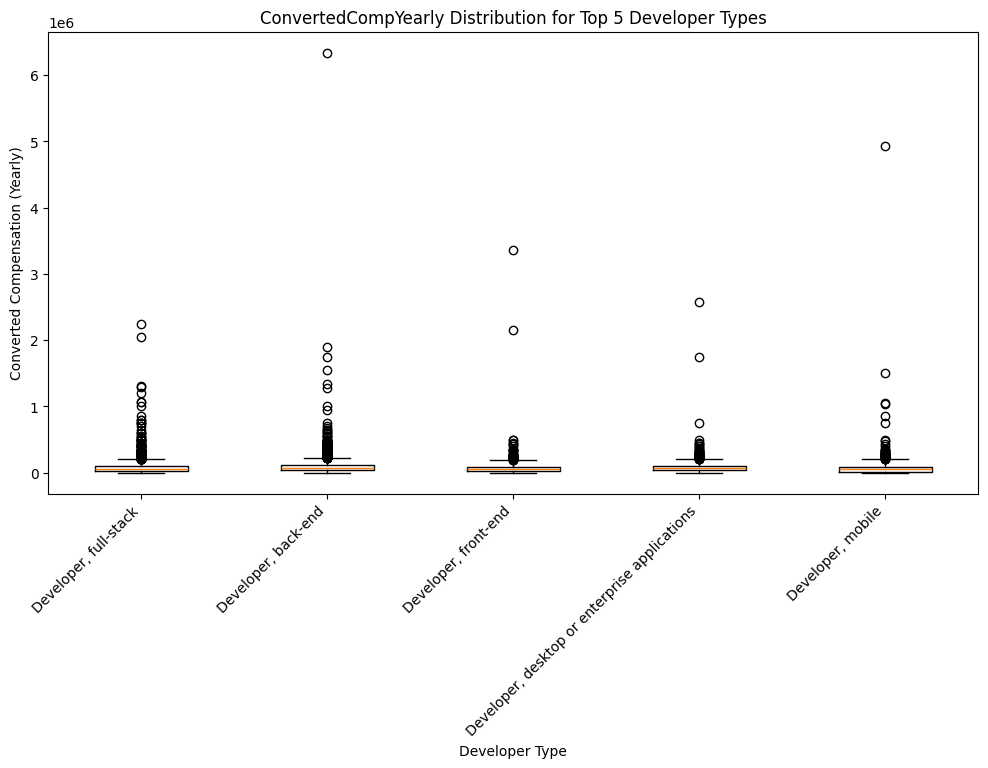

In [12]:
# your code goes here
# Query to get DevType and ConvertedCompYearly data
QUERY = """
SELECT DevType, ConvertedCompYearly 
FROM main 
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND ConvertedCompYearly < 1e7
"""
devtype_df = pd.read_sql_query(QUERY, conn)

# Split DevType and get top 5 types
dev_types = devtype_df['DevType'].str.split(';', expand=True).stack().value_counts().head(5).index
top_dev_df = devtype_df[devtype_df['DevType'].apply(lambda x: any(t in x for t in dev_types))]

# Prepare data for box plot
comp_by_devtype = [top_dev_df[top_dev_df['DevType'].str.contains(dev_type)]['ConvertedCompYearly'].dropna() 
                   for dev_type in dev_types]

# Plot box plot
plt.figure(figsize=(12, 6))
plt.boxplot(comp_by_devtype, labels=dev_types)
plt.title('ConvertedCompYearly Distribution for Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Converted Compensation (Yearly)')
plt.xticks(rotation=45, ha='right')
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_2533/830229256.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(comp_by_country, labels=top_countries)


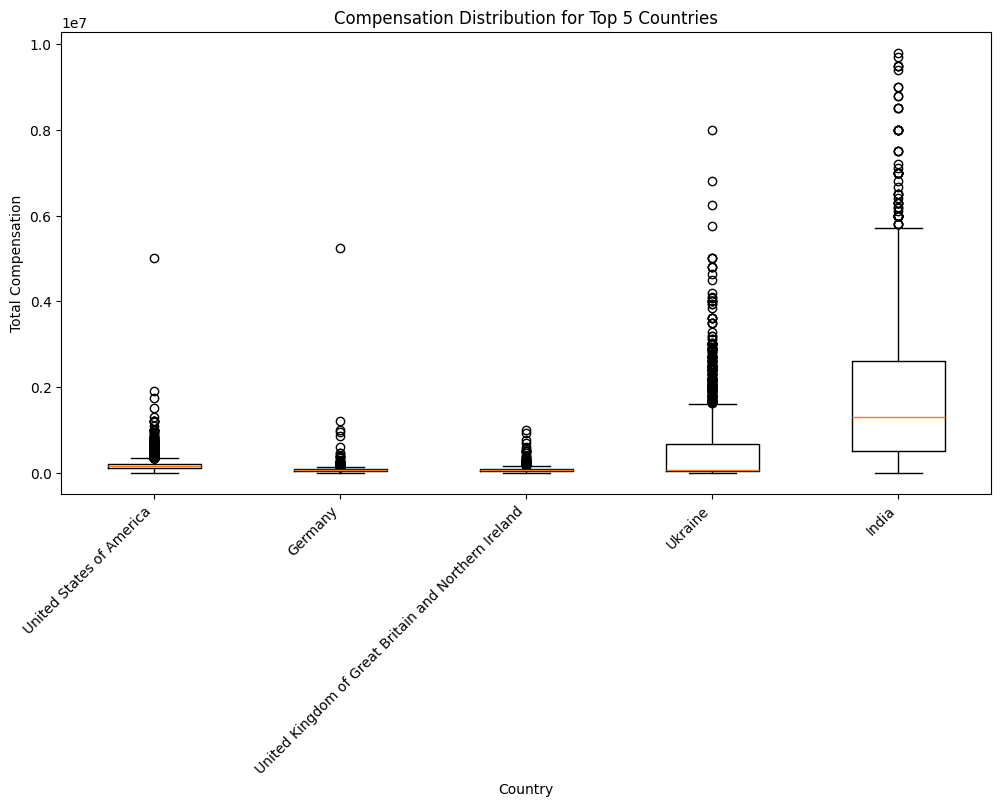

In [13]:
# your code goes here
# Query to get Country and CompTotal data
QUERY = """
SELECT Country, CompTotal 
FROM main 
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL AND CompTotal < 1e7
"""
country_df = pd.read_sql_query(QUERY, conn)

# Get top 5 countries by respondent count
top_countries = country_df['Country'].value_counts().head(5).index
top_country_df = country_df[country_df['Country'].isin(top_countries)]

# Prepare data for box plot
comp_by_country = [top_country_df[top_country_df['Country'] == country]['CompTotal'].dropna() 
                   for country in top_countries]

# Plot box plot
plt.figure(figsize=(12, 6))
plt.boxplot(comp_by_country, labels=top_countries)
plt.title('Compensation Distribution for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_2533/408619056.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(comp_by_emp, labels=emp_types)


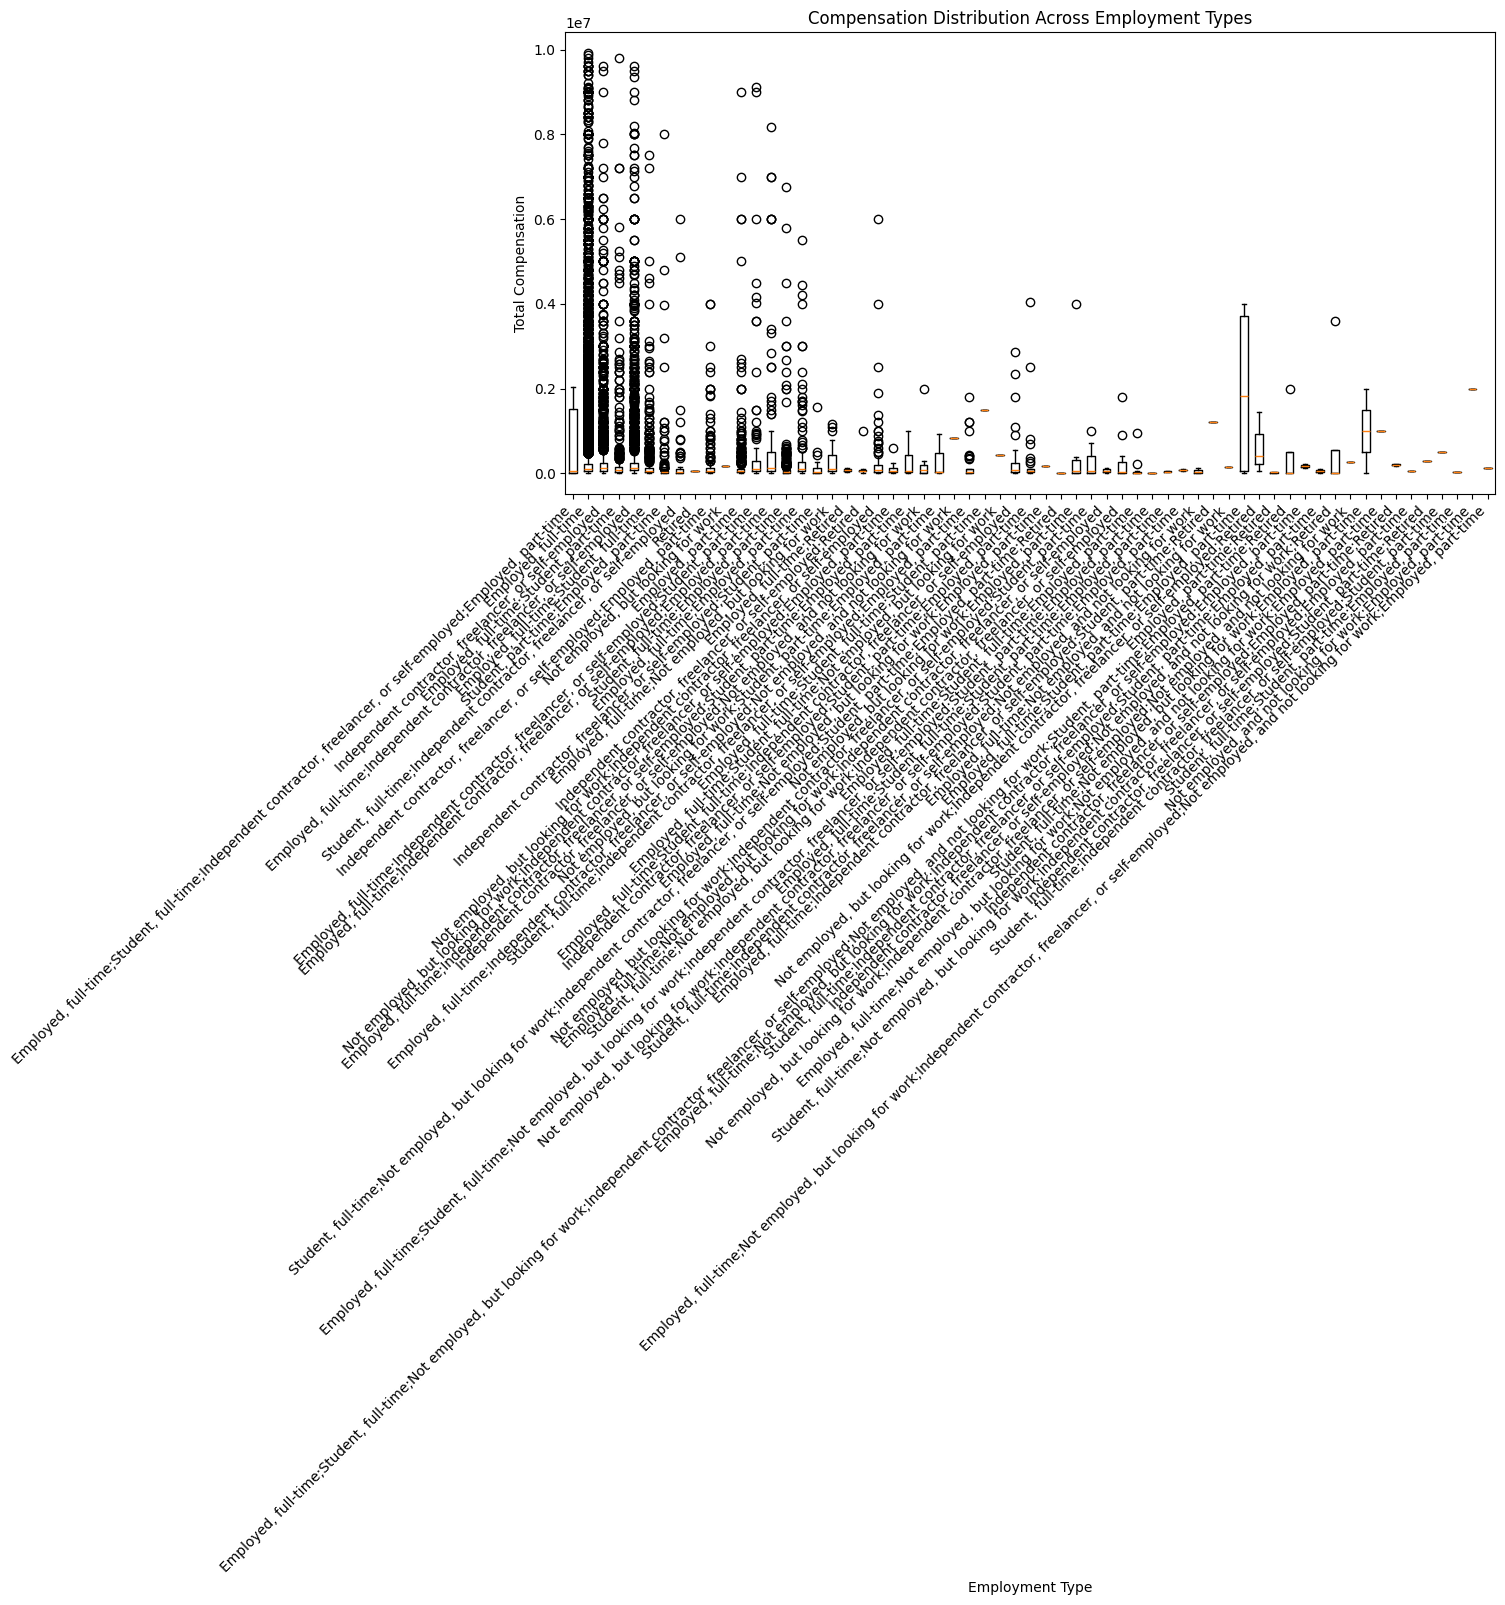

In [14]:
# your code goes here
# Query to get Employment and CompTotal data
QUERY = """
SELECT Employment, CompTotal 
FROM main 
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL AND CompTotal < 1e7
"""
emp_df = pd.read_sql_query(QUERY, conn)

# Prepare data for box plot
emp_types = emp_df['Employment'].unique()
comp_by_emp = [emp_df[emp_df['Employment'] == emp_type]['CompTotal'].dropna() 
               for emp_type in emp_types]

# Plot box plot
plt.figure(figsize=(12, 6))
plt.boxplot(comp_by_emp, labels=emp_types)
plt.title('Compensation Distribution Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_2533/136937793.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(years_by_jobsat, labels=jobsat_levels)


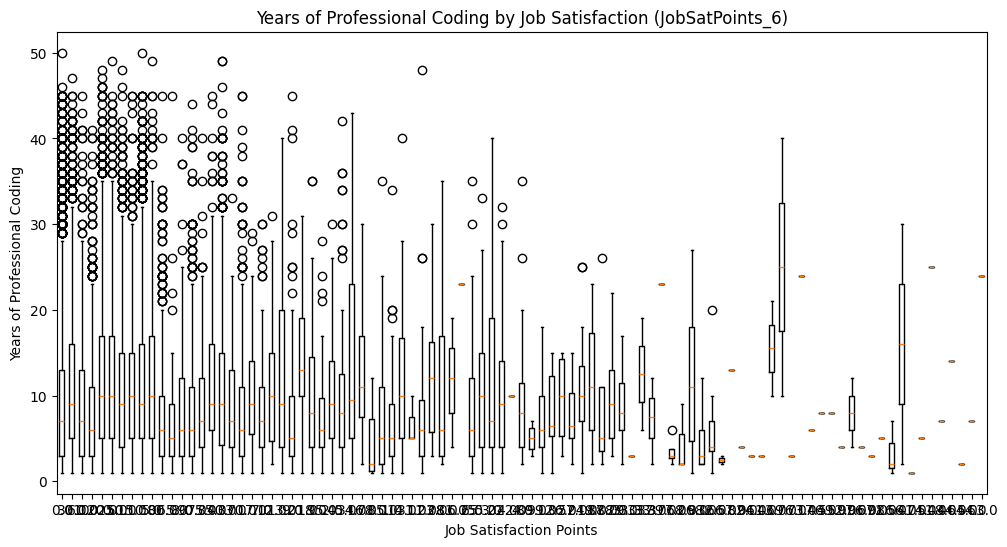

In [16]:
# your code goes here
# Query to get YearsCodePro and JobSatPoints_6 data
QUERY = """
SELECT JobSatPoints_6, YearsCodePro 
FROM main 
WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL
"""
years_jobsat_df = pd.read_sql_query(QUERY, conn)

# Convert YearsCodePro to numeric
years_jobsat_df['YearsCodePro'] = pd.to_numeric(years_jobsat_df['YearsCodePro'], errors='coerce')

# Prepare data for box plot
jobsat_levels = years_jobsat_df['JobSatPoints_6'].unique()
years_by_jobsat = [years_jobsat_df[years_jobsat_df['JobSatPoints_6'] == level]['YearsCodePro'].dropna() 
                   for level in jobsat_levels]

# Plot box plot
plt.figure(figsize=(12, 6))
plt.boxplot(years_by_jobsat, labels=jobsat_levels)
plt.title('Years of Professional Coding by Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Years of Professional Coding')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [17]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
